In [8]:
from hazm import (
    Normalizer, word_tokenize, POSTagger,
    Chunker, tree2brackets, Lemmatizer,
    DependencyParser, Stemmer
)

In [9]:
normalizer = Normalizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()
sentence = "من کتابم را به علی دادم."
# sentence = "سنگ شیشه را شکست."
# sentence = "علی سیب را از درخت چید."
# sentence = "او یک ماشین خرید."
# sentence = "دختر به سگ غذا داد."

# normalize
normalized_sentence = normalizer.normalize(sentence)
print(normalized_sentence)


من کتابم را به علی دادم.


In [10]:
tokens = word_tokenize(normalized_sentence)
print(tokens)
tagger = POSTagger(model='resources/postagger.model')
tagged = tagger.tag(tokens)
print(tagged)

['من', 'کتابم', 'را', 'به', 'علی', 'دادم', '.']
[('من', 'PRO'), ('کتابم', 'N'), ('را', 'POSTP'), ('به', 'P'), ('علی', 'N'), ('دادم', 'V'), ('.', 'PUNC')]


[من NP] [کتابم NP] [را POSTP] [به PP] [علی NP] [دادم VP] .


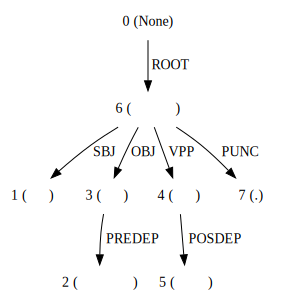

In [11]:
chunker = Chunker(model='resources/chunker.model')
print(tree2brackets(chunker.parse(tagged)))

parser = DependencyParser(tagger=tagger, lemmatizer=lemmatizer)
parser.parse(tokens)

In [12]:
print(tagged)
# Convert Active Voice to Passive Voice
# remove first tag from list if its 'PRO' or 'N'
if tagged[0][1] == 'PRO' or tagged[0][1] == 'N':
    tags = tagged[1:]
else:
    tags = tagged
print(tags)

[('من', 'PRO'), ('کتابم', 'N'), ('را', 'POSTP'), ('به', 'P'), ('علی', 'N'), ('دادم', 'V'), ('.', 'PUNC')]
[('کتابم', 'N'), ('را', 'POSTP'), ('به', 'P'), ('علی', 'N'), ('دادم', 'V'), ('.', 'PUNC')]


In [13]:
# purify the verb
verbs = [item[0] for item in tags if item[1] == 'V'][0]
print(verbs)
verbs = lemmatizer.lemmatize(verbs).split("#")
print(verbs)

دادم
['داد', 'ده']


In [14]:
new_sentence = ""
# if first item in tags is 'P' add it to new sentence
if tags[0][1] == 'P':
    new_sentence = new_sentence + tags[0][0] + " "
# get first 'N' from tags list and add it to new sentence
for item in tags:
    if item[1] == 'N':
        new_sentence += lemmatizer.lemmatize(item[0])
        # remote item from tags list
        tags.remove(item)
        break

# get 'P' from tags list and add it to new sentence
for item in tags:
    if item[1] == 'P':
        if item[0] not in new_sentence:
            new_sentence += " " + item[0]
            # remote item from tags list
            tags.remove(item)
        break

# get second 'N' from tags list and add it to new sentence
for item in tags:
    if item[1] == 'N':
        new_sentence += " " + item[0]
        # remote item from tags list
        tags.remove(item)
        break

new_sentence = new_sentence + " " + verbs[0] + "ه" + " " + "شد."
print("Active sentence: ", sentence)
print("Passive sentence: ", new_sentence)

Active sentence:  من کتابم را به علی دادم.
Passive sentence:  کتاب به علی داده شد.
